In [1]:
import torch
from backbone import new_backbone

In [2]:
import pickle
FINE_LABELS = [
    'apple',  # id 0
    'aquarium_fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'computer_keyboard',
    'lamp',
    'lawn_mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple_tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak_tree',
    'orange',
    'orchid',
    'otter',
    'palm_tree',
    'pear',
    'pickup_truck',
    'pine_tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet_pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow_tree',
    'wolf',
    'woman',
    'worm',
]

test = pickle.load(open("./data/train.pkl", "rb"))
test

{b'coarse_labels': array([ 4,  4,  4, ..., 13, 13, 13], shape=(10000,)),
 b'fine_labels': array([ 0,  0,  0, ..., 99, 99, 99], shape=(10000,)),
 b'data': array([[170, 168, 159, ..., 123, 144, 162],
        [  4,   2,   2, ...,   0,   1,   1],
        [158, 162, 162, ..., 161, 158, 154],
        ...,
        [143, 146, 146, ..., 123, 136, 135],
        [163, 163, 160, ...,   9,  11,   6],
        [ 71,  72,  69, ...,  65,  64,  64]],
       shape=(10000, 3072), dtype=uint8)}

In [3]:
import random
from dataset import ModifiedCIFAR100

train_data = ModifiedCIFAR100(fine_grained=True)
train_data[0]

{'image': tensor([[[0.6667, 0.6588, 0.6235,  ..., 0.7020, 0.7137, 0.7255],
          [0.6706, 0.6667, 0.6196,  ..., 0.7098, 0.6431, 0.5725],
          [0.6588, 0.6275, 0.5882,  ..., 0.6275, 0.5451, 0.4824],
          ...,
          [0.5765, 0.5490, 0.5686,  ..., 0.2667, 0.1451, 0.1255],
          [0.6471, 0.6078, 0.5922,  ..., 0.2157, 0.2353, 0.3608],
          [0.6196, 0.6510, 0.6471,  ..., 0.4784, 0.5333, 0.5961]],
 
         [[0.6824, 0.6745, 0.6353,  ..., 0.7451, 0.7529, 0.7725],
          [0.6902, 0.6863, 0.6353,  ..., 0.7333, 0.6706, 0.5882],
          [0.6784, 0.6471, 0.6039,  ..., 0.6078, 0.5098, 0.4196],
          ...,
          [0.5686, 0.5412, 0.5529,  ..., 0.1647, 0.0863, 0.0902],
          [0.6471, 0.5922, 0.5647,  ..., 0.1647, 0.2157, 0.3490],
          [0.6157, 0.6431, 0.6471,  ..., 0.4745, 0.5373, 0.6000]],
 
         [[0.6078, 0.6235, 0.5882,  ..., 0.7294, 0.7412, 0.7647],
          [0.6118, 0.6196, 0.5725,  ..., 0.7216, 0.6431, 0.5608],
          [0.6000, 0.5686, 0.52

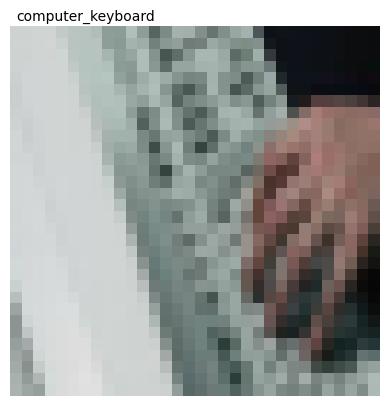

In [9]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

sample = train_data[random.randint(0, len(train_data) - 1)]
# image = np.transpose(sample['image'], (1, 2, 0))
image = sample['image']
img_for_plt = np.asarray(image).transpose(1, 2, 0)
label = sample['label']

plt.imshow(img_for_plt)
plt.axis('off')
plt.text(0, -1, FINE_LABELS[label])
plt.show()

In [16]:
sample = train_data[random.randint(0, len(train_data) - 1)]
img = sample['image'].unsqueeze(0)
label = sample['label']

backbone = new_backbone()
backbone.eval()

with torch.no_grad():
    features = backbone(img)
features.shape

torch.Size([1, 576])

In [18]:
train_dataset = ModifiedCIFAR100(train=True, fine_grained=True)
test_dataset = ModifiedCIFAR100(train=False, fine_grained=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

backbone = new_backbone()

for batch in train_loader:
    images = batch['image']
    labels = batch['label']

    with torch.no_grad():
        features = backbone(images)

    print(features.shape)


torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size